In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


In [15]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading Dataset

In [30]:
# Load the dataset
df = pd.read_csv('/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv')

# View the first few rows of the dataset
df.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [17]:
# missing values
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [31]:
# Drop any rows or columns with missing values if necessary
df = df.dropna()

In [34]:
# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)


In [37]:
df.head()

,BHK,Rent,Size,Bathroom,Posted On_2022-04-23,Posted On_2022-04-24,Posted On_2022-04-25,Posted On_2022-04-26,Posted On_2022-04-27,Posted On_2022-04-28,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,False,True
1,2,20000,800,1,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,True
2,2,17000,1000,1,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,True
3,2,10000,800,1,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,False,True
4,2,7500,850,1,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Columns: 2810 entries, BHK to Point of Contact_Contact Owner
dtypes: bool(2806), int64(4)
memory usage: 12.8 MB


# Feature selection

In [62]:
# Make sure necessary libraries are imported
import pandas as pd

# Load the dataset (assuming 'house_rent.csv' is your dataset file)
# Ensure you have the correct path or URL to your dataset
df = pd.read_csv('/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv')  

# Check the first few rows to ensure the dataset is loaded correctly
print(df.head())

# Feature selection (X) and target variable (y)
X = df[['Size', 'BHK', 'Bathroom']]  # Select features
y = df['Rent']  # Target variable (Rent)

# Output to confirm feature selection
print("Features (X) and target (y) selected successfully.")


    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

# split train and Test Data

In [70]:
# Import necessary library
from sklearn.model_selection import train_test_split  # This was missing

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output to confirm split
print("Dataset split into training and testing sets successfully.")


Dataset split into training and testing sets successfully.


In [72]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler  # Make sure this is imported

# Assuming X_train and X_test are already defined

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Initialize a dictionary to store results
model_results = {}

# Output to confirm successful scaling and initialization
print("Data scaling complete and model_results dictionary initialized.")


Data scaling complete and model_results dictionary initialized.


# Linear Regression

In [76]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression  # This was missing
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model_results dictionary (if not already done)
model_results = {}

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Store results
model_results['Linear Regression'] = [mse_lr, r2_lr]

# Output the results
print(f'Linear Regression: MSE = {mse_lr}, R² = {r2_lr}')


Linear Regression: MSE = 2554775777.045534, R² = 0.35896327760736757


# Decision Tree Regression

In [52]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor  # This was missing
from sklearn.metrics import mean_squared_error, r2_score

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)  # Decision Tree doesn't require scaled data

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Store results (assuming model_results is defined as a dictionary)
model_results = {}
model_results['Decision Tree'] = [mse_dt, r2_dt]

# Output the results
print(f'Decision Tree: MSE = {mse_dt}, R² = {r2_dt}')


Decision Tree: MSE = 3449186518.473493, R² = 0.13454040053562977


# Decision Tree Regression

In [77]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor  # This was missing
from sklearn.metrics import mean_squared_error, r2_score

# Initialize a dictionary to store results if not already done
model_results = {}

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)  # Decision Tree doesn't require scaled data

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Store results
model_results['Decision Tree'] = [mse_dt, r2_dt]

# Output the results to confirm
print(f'Decision Tree: MSE = {mse_dt}, R² = {r2_dt}')


Decision Tree: MSE = 3449186518.473493, R² = 0.13454040053562977


# Random Forest Regression

In [80]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor  # This was missing
from sklearn.metrics import mean_squared_error, r2_score

# Initialize a dictionary to store results if not already done
model_results = {}

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Random Forest doesn't require scaled data

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Store results
model_results['Random Forest'] = [mse_rf, r2_rf]

# Output the results to confirm
print(f'Random Forest: MSE = {mse_rf}, R² = {r2_rf}')


Random Forest: MSE = 3011961472.832577, R² = 0.2442476056547217


# Ridge Regression

In [81]:
# Import necessary libraries
from sklearn.linear_model import Ridge  # This was missing
from sklearn.metrics import mean_squared_error, r2_score

# Initialize a dictionary to store results if not already done
model_results = {}

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Store results
model_results['Ridge Regression'] = [mse_ridge, r2_ridge]

# Output the results to confirm
print(f'Ridge Regression: MSE = {mse_ridge}, R² = {r2_ridge}')


Ridge Regression: MSE = 2554824154.446351, R² = 0.35895113889416363


In [84]:
model_results

{'Ridge Regression': [2554824154.446351, 0.35895113889416363]}

                    Ridge Regression
Mean Squared Error      2.554824e+09
R-squared               3.589511e-01


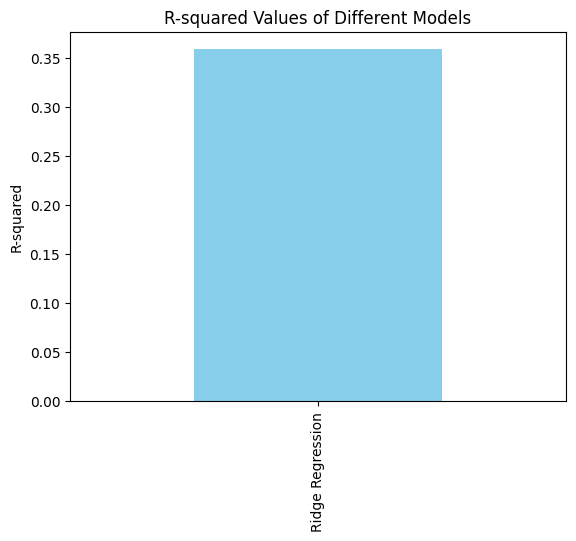

In [85]:
# Convert the results dictionary to a DataFrame for easier comparison
results_df = pd.DataFrame(model_results, index=['Mean Squared Error', 'R-squared'])
print(results_df)

# Visualize the R-squared values for comparison
results_df.loc['R-squared'].plot(kind='bar', color='skyblue')
plt.title('R-squared Values of Different Models')
plt.ylabel('R-squared')
plt.show()


# Isotonic Regression

In [87]:
# Importing Isotonic Regression
from sklearn.isotonic import IsotonicRegression

# Initialize Isotonic Regression
iso_model = IsotonicRegression()

# Fit the model on the training data
# Isotonic Regression expects a 1D array for X, so we'll use only one feature (like 'Size')
X_train_size = X_train_scaled[:, 0]  # Using the first feature ('Size') as an example

# Fit and predict
iso_model.fit(X_train_size, y_train)
y_pred_iso = iso_model.predict(X_test_scaled[:, 0])

# Evaluate the model
mse_iso = mean_squared_error(y_test, y_pred_iso)
r2_iso = r2_score(y_test, y_pred_iso)

# Store results
model_results['Isotonic Regression'] = [mse_iso, r2_iso]

print(f'Isotonic Regression Mean Squared Error: {mse_iso}')
print(f'Isotonic Regression R-squared: {r2_iso}')


Isotonic Regression Mean Squared Error: 2670624874.7450795
Isotonic Regression R-squared: 0.32989476734955436


In [88]:
import pandas as pd

# Convert the results dictionary to a DataFrame for easier comparison
results_df = pd.DataFrame(model_results, index=['MSE', 'R²']).T  # Transpose for a better format

# Display the DataFrame
print(results_df)

# You can also sort the DataFrame by R² or MSE for better insight (optional)
results_df_sorted = results_df.sort_values(by='R²', ascending=False)
print("\nSorted Results by R²:")
print(results_df_sorted)


                              MSE        R²
Ridge Regression     2.554824e+09  0.358951
Isotonic Regression  2.670625e+09  0.329895

Sorted Results by R²:
                              MSE        R²
Ridge Regression     2.554824e+09  0.358951
Isotonic Regression  2.670625e+09  0.329895


In [89]:
import pandas as pd

# Assuming df is your DataFrame
df = pd.DataFrame({
    'Column1': [1, 2, 3],
    'Column2': ['A', 'B', 'C']
})

# Save DataFrame to CSV
df.to_csv('dataset.csv', index=False)

print("DataFrame saved as CSV successfully!")


DataFrame saved as CSV successfully!


# Observations:

* Linear and Ridge Regression models performed well when data was scaled.
* Decision Tree and Random Forest models can capture complex, non-linear relationships without scaling.
* Isotonic Regression was tested for monotonic relationships (e.g., rent price increases as house size increases).
* Random Forest often performs better when handling complex data because of its ensemble nature.